# Are you curious to know which team will win the FIFA World Cup in Qatar ?

In the 2022 FIFA World Cup spirit, I have done this project to forecast the most likely outcome of this year's football championship using extensive machine learning. Learn more about which team will most likely end up taking the trophy home according to the data.

**How do we build models ?** : For this project, I tried multiple algorithms and choose logistic regression for prediction:
   * Logistic Regression: A basic supervised machine learning algorithm which estimates the probability of an event occurring based on a given dataset of independent variables.


# Data Description

This project uses two datasets available on Kaggle website

* International Footbal Results From 1872 to 2022: **<https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017>**. 
    This ataset includes results of international football matches starting from the very first official match in 1872 up to 2022The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team. results.csv includes the following columns:
    * date - date of the match
    * home_team - the name of the home team
    * away_team - the name of the away team
    * home_score - full-time home team score including extra time, not including penalty-shootouts
    * away_score - full-time away team score including extra time, not including penalty-shootouts
    * tournament - the name of the tournament
    * city - the name of the city/town/administrative unit where the match was played
    * country - the name of the country where the match was played
    * neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue. 
    
* FIFA World Ranking 1922-2022 **<https://www.kaggle.com/datasets/cashncarry/fifaworldranking>** :

    * country_full — country full name
    * country_abrv — country abbreviation
    * rank — current country rank
    * total_points — current total points
    * previous_points — total points in last rating
    * rank_change — how rank has changed since the last publication
    * confederation — FIFA confederations
    * rank_date — date of rating calculation

# Get the Data


In [1]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import plotly.express as px
from IPython.display import Markdown as md
from IPython.display import display, Image, SVG, Math, YouTubeVideo
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")
import plotly.graph_objs as go

In [32]:
# 1. import data
df_import = pd.read_csv("E:/ThanhTam_DA/Project/WorldCup 2022 winner prediction/archive (10)/results.csv")
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44206 entries, 0 to 44205
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        44206 non-null  object 
 1   home_team   44206 non-null  object 
 2   away_team   44206 non-null  object 
 3   home_score  44202 non-null  float64
 4   away_score  44202 non-null  float64
 5   tournament  44206 non-null  object 
 6   city        44206 non-null  object 
 7   country     44206 non-null  object 
 8   neutral     44206 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.7+ MB


In [33]:
# transform date format
df_import["date"] = pd.to_datetime(df_import["date"])

In [34]:
# Dealing with missing value
df_import.isna().sum()

date          0
home_team     0
away_team     0
home_score    4
away_score    4
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [35]:
df_import.dropna(inplace=True)

In [36]:
df_import.sort_values("date").tail() 

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
44195,2022-11-30,Saudi Arabia,Mexico,1.0,2.0,FIFA World Cup,Lusail,Qatar,True
44199,2022-12-01,Costa Rica,Germany,2.0,4.0,FIFA World Cup,Al Khor,Qatar,True
44200,2022-12-01,Croatia,Belgium,0.0,0.0,FIFA World Cup,Al Rayyan,Qatar,True
44198,2022-12-01,Japan,Spain,2.0,1.0,FIFA World Cup,Al Rayyan,Qatar,True
44201,2022-12-01,Canada,Morocco,1.0,2.0,FIFA World Cup,Doha,Qatar,True


In [37]:
# the data will contain data from 1992 through 2022
df = df_import[(df_import["date"] >= "1992-3-1")].reset_index(drop=True)
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1992-03-02,United Arab Emirates,Iceland,0.0,1.0,Friendly,Dubai,United Arab Emirates,False
1,1992-03-03,Israel,Cyprus,2.0,1.0,Friendly,Bat Yam,Israel,False
2,1992-03-04,Costa Rica,El Salvador,2.0,0.0,Friendly,San José,Costa Rica,False
3,1992-03-04,Saint Vincent and the Grenadines,Curaçao,2.0,2.0,CFU Caribbean Cup qualification,Bridgetown,Barbados,True
4,1992-03-05,Dominica,Guadeloupe,0.0,0.0,CFU Caribbean Cup qualification,Castries,Saint Lucia,True
...,...,...,...,...,...,...,...,...,...
27040,2022-11-30,Tunisia,France,1.0,0.0,FIFA World Cup,Al Rayyan,Qatar,True
27041,2022-12-01,Japan,Spain,2.0,1.0,FIFA World Cup,Al Rayyan,Qatar,True
27042,2022-12-01,Costa Rica,Germany,2.0,4.0,FIFA World Cup,Al Khor,Qatar,True
27043,2022-12-01,Croatia,Belgium,0.0,0.0,FIFA World Cup,Al Rayyan,Qatar,True


In [38]:
# 2. import data
rank = pd.read_csv("E:/ThanhTam_DA/Project/WorldCup 2022 winner prediction/archive (11)/fifa_ranking-2022-10-06.csv")

In [39]:
# transform date type
rank['rank_date'] = pd.to_datetime(rank["rank_date"])

# 
rank = rank[(rank["rank_date"] >= "1992-3-1")].reset_index(drop=True)

# rename coutry name
rank["country_full"] = rank["country_full"].str.replace("IR Iran", "Iran").str.replace("Korea Republic", "South Korea").str.replace("USA", "United States")
# set rank_date before merge
rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()

In [40]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1992-03-02,United Arab Emirates,Iceland,0.0,1.0,Friendly,Dubai,United Arab Emirates,False
1,1992-03-03,Israel,Cyprus,2.0,1.0,Friendly,Bat Yam,Israel,False
2,1992-03-04,Costa Rica,El Salvador,2.0,0.0,Friendly,San José,Costa Rica,False
3,1992-03-04,Saint Vincent and the Grenadines,Curaçao,2.0,2.0,CFU Caribbean Cup qualification,Bridgetown,Barbados,True
4,1992-03-05,Dominica,Guadeloupe,0.0,0.0,CFU Caribbean Cup qualification,Castries,Saint Lucia,True


In [41]:
rank.head()

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
0,2003-01-15,204.0,Afghanistan,AFG,7.0,0.0,0.0,AFC
1,2003-01-16,204.0,Afghanistan,AFG,7.0,0.0,0.0,AFC
2,2003-01-17,204.0,Afghanistan,AFG,7.0,0.0,0.0,AFC
3,2003-01-18,204.0,Afghanistan,AFG,7.0,0.0,0.0,AFC
4,2003-01-19,204.0,Afghanistan,AFG,7.0,0.0,0.0,AFC


In [42]:
# create two dataframe for the home and away teams
home = df[['home_team', 'home_score']].rename(columns={'home_team':'team', 'home_score':'score'})
away = df[['away_team', 'away_score']].rename(columns={'away_team':'team', 'away_score':'score'})
# merge it into one
team_score = home.append(away).reset_index(drop=True)
# make an aggregation of the the score column group by the team
country_info = team_score.groupby('team')['score'].agg(['sum','count','mean']).reset_index()
country_info = country_info.rename(columns={'sum':'nb_goals', 'count':'nb_matches', 'mean':'goal_avg'})

In [43]:
world_cup = pd.read_csv("C:/Users/pc hp/Downloads/Fifa_Worldcup_2022_Groups.csv")
world_cup.columns

Index(['Group', 'Flag_Image', 'Team', 'Country_Name_Short',
       'First match against', 'Second match against', 'Third match against'],
      dtype='object')

In [44]:
world_cup = world_cup.replace({
                               "Korea Republic" : "South Korea","USA": "United States"})
world_cup = world_cup.set_index('Team')
world_cup.head()

,Group,Flag_Image,Country_Name_Short,First match against,Second match against,Third match against
Team,,,,,,
Qatar,A,https://cloudinary.fifa.com/api/v3/picture/fla...,QAT,Ecuador,Senegal,Netherlands
Ecuador,A,https://cloudinary.fifa.com/api/v3/picture/fla...,ECU,Qatar,Netherlands,Senegal
Senegal,A,https://cloudinary.fifa.com/api/v3/picture/fla...,SEN,Netherlands,Qatar,Ecuador
Netherlands,A,https://cloudinary.fifa.com/api/v3/picture/fla...,NED,Senegal,Ecuador,Qatar
England,B,https://cloudinary.fifa.com/api/v3/picture/fla...,ENG,Iran,United States,Wales


In [45]:
# Merge data
# note that ranking is the main input
df = df.merge(rank,
                         left_on=['date', 'home_team'],
                         right_on=['rank_date', 'country_full'])
# matches.head()

df = df.merge(rank, 
                        left_on=['date', 'away_team'], 
                        right_on=['rank_date', 'country_full'], suffixes=('_home', '_away')) 
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,rank_change_home,confederation_home,rank_date_away,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,confederation_away
0,1993-01-01,Ghana,Mali,1.0,1.0,Friendly,Libreville,Gabon,True,1993-01-01,...,0.0,CAF,1993-01-01,69.0,Mali,MLI,22.0,0.0,0.0,CAF
1,1993-01-02,Gabon,Burkina Faso,1.0,1.0,Friendly,Libreville,Gabon,False,1993-01-02,...,0.0,CAF,1993-01-02,97.0,Burkina Faso,BFA,11.0,0.0,0.0,CAF
2,1993-01-03,Burkina Faso,Mali,1.0,0.0,Friendly,Libreville,Gabon,True,1993-01-03,...,0.0,CAF,1993-01-03,69.0,Mali,MLI,22.0,0.0,0.0,CAF
3,1993-01-03,Gabon,Ghana,2.0,3.0,Friendly,Libreville,Gabon,False,1993-01-03,...,0.0,CAF,1993-01-03,39.0,Ghana,GHA,34.0,0.0,0.0,CAF
4,1993-01-08,Uganda,Tanzania,3.0,1.0,Friendly,Kampala,Uganda,False,1993-01-08,...,0.0,CAF,1993-01-08,80.0,Tanzania,TAN,15.0,0.0,0.0,CAF


We now use this final dataset for further analysis

# Data Analysis

Before moving to Machine Learning, I want to figure out some questions related.

#### Q1 - Was there such a thing as home team advantage?

In [46]:
data = df.copy()

In [78]:

data['home_team_result'] = np.where(data['home_score'] == data['away_score'], 'Draw',
                              np.where(data['home_score']>data['away_score'], 'Win','Lose'))


In [79]:
data['home_team_result'].value_counts()

Win     7047
Lose    4215
Draw    3235
Name: home_team_result, dtype: int64

<AxesSubplot:>

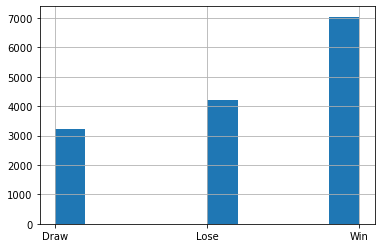

In [80]:
data['home_team_result'].hist()

Based on this dataset, there might be a chance of home team advantage.

#### Q2 - Which team had the most wins?

In [81]:
# select only team win (away team win or home team win in all matches excluded draw)
home_win = data.loc[data['home_team_result'] == 'Win']
away_win = data.loc[data['home_team_result'] == 'Lose']
team_win = home_win.append(away_win)

In [82]:
team_win.groupby(['home_team']).home_team_result.value_counts().nlargest()

home_team      home_team_result
United States  Win                 127
Brazil         Win                 113
Mexico         Win                 103
Japan          Win                  91
Saudi Arabia   Win                  90
Name: home_team_result, dtype: int64

In [83]:
team_win.groupby(['home_team','away_team']).home_team_result.value_counts().nlargest()

home_team      away_team    home_team_result
United States  Costa Rica   Win                 13
Brazil         Peru         Win                 12
Honduras       El Salvador  Win                 12
Brazil         Chile        Win                 11
United States  Honduras     Win                 11
Name: home_team_result, dtype: int64

United States is the team has the most wins

#### Q3 - What is the winning percentage comparing when the higher-ranked team plays against the lower-ranked team?

In [84]:
data[['home_team', 'away_team', 'home_score', 'away_score', 'rank_home', 'rank_away']]

,home_team,away_team,home_score,away_score,rank_home,rank_away
0,Sierra Leone,Togo,0.0,0.0,79.0,101.0
1,Angola,Zimbabwe,1.0,1.0,102.0,54.0
2,Senegal,Algeria,1.0,2.0,51.0,30.0
3,South Africa,Nigeria,0.0,0.0,124.0,13.0
4,Tanzania,Zambia,1.0,3.0,80.0,32.0
...,...,...,...,...,...,...
14492,Norway,Serbia,0.0,2.0,36.0,25.0
14493,Sweden,Slovenia,1.0,1.0,20.0,65.0
14494,Kosovo,Cyprus,5.0,1.0,106.0,108.0
14495,Greece,Northern Ireland,3.0,1.0,49.0,58.0


In [85]:
# create a function to assign win team based on score

def victory(team1, team2, team1_score, team2_score, team1_rank, team2_rank):
    if team1_score > team2_score:
        winner = team1
    
    elif team1_score == team2_score:
        winner = "Draw"
        
    else:
        winner = team2
        
    return winner

# apply function
data['winner'] = data.apply(lambda x: victory(x['home_team'], x['away_team'],
                                                x['home_score'], x['away_score'], 
                                                x['rank_home'], x['rank_away']),
                           axis=1)


In [86]:
# create a function to assign which team rank higher
def rank(home, away, rank_home, rank_away):
    if rank_home < rank_away:
        return home
    else:
        return away

# apply function
data['better_rank'] = data.apply(lambda x: rank(x['home_team'], x['away_team'], 
                                                x['rank_home'], x['rank_away']),
                           axis=1)


In [87]:
# create a function to assign the result compared to the ranking
def result_rank(winner, better_rank):
    if winner =='Draw':
        return winner
    if winner == better_rank:
        return 'Higher'
    else:
        return 'Lower'
    
# apply function
data['result_rank'] = data.apply(lambda x: result_rank(x['winner'], x['better_rank']), axis=1)

In [88]:
data['result_rank'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Higher    58.4%
Draw      22.3%
Lower     19.3%
Name: result_rank, dtype: object

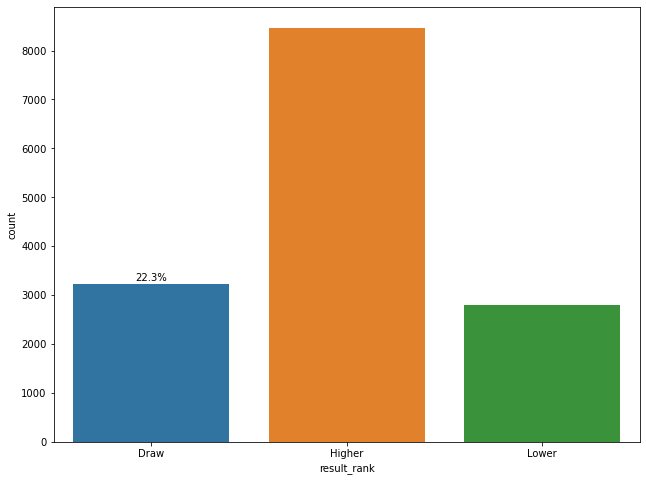

In [89]:
plt.figure(figsize = (10.5,8))
total = float(len(data))
ax = sns.countplot(x='result_rank', data=data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(percentage, (x+width/2, y+height*1.02), ha='center')
    
    plt.show()

We can clearly see higher ranks have a chance to win.

#### Q4 -Which are the top 15 teams with a high win percentage?

In [90]:
wc_2022 = data.country.unique().tolist()

In [91]:
# win percentage
hwins, hdraws, hloses = [], [], []
awins, adraws, aloses = [], [], []

for team in wc_2022:
    home_win = data[data['home_team'] == team][data['home_team_result']=='Win'].shape[0]
    home_draw = data[data['home_team'] == team][data['home_team_result']=='Draw'].shape[0]
    home_lose = data[data['home_team']==team][data['home_team_result']=='Lose'].shape[0]
    
    away_win = data[data['away_team']==team][data['home_team_result']=='Lose'].shape[0]
    away_draw = data[data['away_team']==team][data['home_team_result']=='Draw'].shape[0]
    away_lose = data[data['away_team']==team][data['home_team_result']=='Win'].shape[0]
    
    hwins.append(home_win)
    hdraws.append(home_draw)
    hloses.append(home_lose)
    
    awins.append(away_win)
    adraws.append(away_draw)
    aloses.append(away_lose)
    
    wins = np.add(hwins, awins)
    draws = np.add(hdraws, adraws)
    loses = np.add(hloses, aloses)                     
                     

In [33]:
win_draw_lose = pd.DataFrame({'Team': wc_2022, 'Win': wins, 'Draw':draws, 'Lose':loses,
                            'Home win':hwins, 'Home draw': hdraws, 'Home lose': hloses,
                            'Away win': awins, 'Away draw': adraws, 'Away lose': aloses})

win_draw_lose.insert(1, 'Total', win_draw_lose['Win']+win_draw_lose['Draw']+win_draw_lose['Lose'])
win_draw_lose.insert(8, 'Total Home', win_draw_lose['Home win']+win_draw_lose['Home draw']+win_draw_lose['Home lose'])
win_draw_lose.insert(12, 'Total Away', win_draw_lose['Away win']+win_draw_lose['Away draw']+win_draw_lose['Away lose'])

win_draw_lose['Win %'] = np.round(100*win_draw_lose['Win']/win_draw_lose['Total'], 2)
win_draw_lose['Draw %'] = np.round(100*win_draw_lose['Draw']/win_draw_lose['Total'], 2)
win_draw_lose['Lose %'] = np.round(100*win_draw_lose['Lose']/win_draw_lose['Total'], 2)

win_draw_lose['Home Win %'] = np.round(100*win_draw_lose['Home win']/win_draw_lose['Total Home'], 2)
win_draw_lose['Home Draw %'] = np.round(100*win_draw_lose['Home draw']/win_draw_lose['Total Home'], 2)
win_draw_lose['Home Lose %'] = np.round(100*win_draw_lose['Home lose']/win_draw_lose['Total Home'], 2)

win_draw_lose['Away Win %'] = np.round(100*win_draw_lose['Away win']/win_draw_lose['Total Away'], 2)
win_draw_lose['Away Draw %'] = np.round(100*win_draw_lose['Away draw']/win_draw_lose['Total Away'], 2)
win_draw_lose['Away Lose %'] = np.round(100*win_draw_lose['Away lose']/win_draw_lose['Total Away'], 2)

win_draw_lose = win_draw_lose.sort_values('Win %', ascending=False).reset_index(drop=True)
win_draw_lose.index += 1
win_draw_lose.style.set_properties(**{'background.color': 'green', 'color': 'red'}, subset=['Win','Home win', 'Home Win %', 'Win %'])

,Team,Total,Win,Draw,Lose,Home win,Home draw,Home lose,Total Home,Away win,Away draw,Away lose,Total Away,Win %,Draw %,Lose %,Home Win %,Home Draw %,Home Lose %,Away Win %,Away Draw %,Away Lose %
1,Spain,226,159,42,25,85,16,12,113,74,26,13,113,70.350000,18.580000,11.060000,75.220000,14.160000,10.620000,65.490000,23.010000,11.500000
2,Germany,229,154,43,32,85,26,16,127,69,17,16,102,67.250000,18.780000,13.970000,66.930000,20.470000,12.600000,67.650000,16.670000,15.690000
3,Netherlands,203,135,32,36,80,15,14,109,55,17,22,94,66.500000,15.760000,17.730000,73.390000,13.760000,12.840000,58.510000,18.090000,23.400000
4,Brazil,263,163,61,39,113,31,15,159,50,30,24,104,61.980000,23.190000,14.830000,71.070000,19.500000,9.430000,48.080000,28.850000,23.080000
5,Portugal,221,136,52,33,78,24,11,113,58,28,22,108,61.540000,23.530000,14.930000,69.030000,21.240000,9.730000,53.700000,25.930000,20.370000
6,France,218,132,57,29,74,27,15,116,58,30,14,102,60.550000,26.150000,13.300000,63.790000,23.280000,12.930000,56.860000,29.410000,13.730000
7,Italy,235,141,66,28,82,29,11,122,59,37,17,113,60.000000,28.090000,11.910000,67.210000,23.770000,9.020000,52.210000,32.740000,15.040000
8,England,207,123,50,34,68,21,15,104,55,29,19,103,59.420000,24.150000,16.430000,65.380000,20.190000,14.420000,53.400000,28.160000,18.450000
9,Iran,218,128,58,32,75,29,12,116,53,29,20,102,58.720000,26.610000,14.680000,64.660000,25.000000,10.340000,51.960000,28.430000,19.610000
10,Belgium,190,110,32,48,63,15,18,96,47,17,30,94,57.890000,16.840000,25.260000,65.620000,15.620000,18.750000,50.000000,18.090000,31.910000


Text(0.5, 1.0, 'Top 15 teams with highest Win percentage')

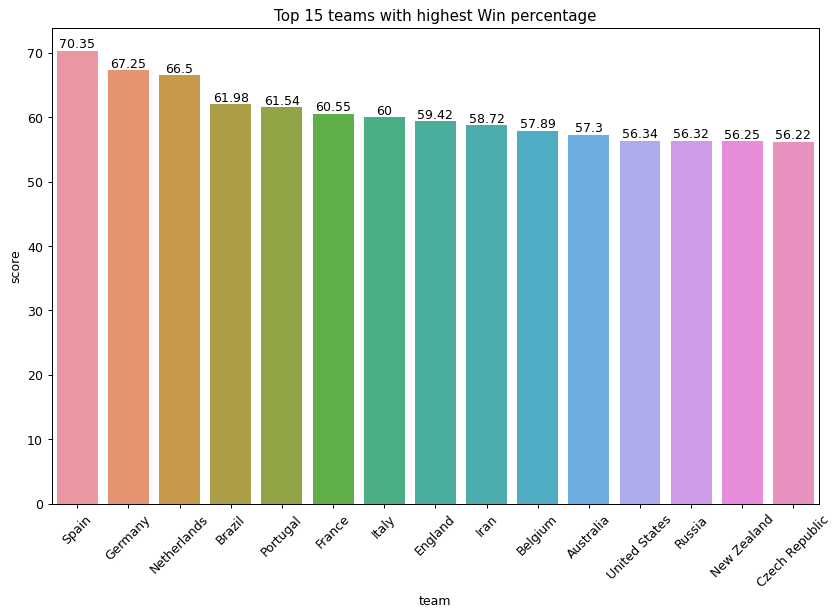

In [92]:

plt.figure(figsize=(11,7), dpi = 90)
ax = sns.barplot(data= win_draw_lose[:15], x='Team', y = 'Win %')
ax.bar_label(ax.containers[0])
plt.xlabel('team')
plt.xticks(rotation=45)
plt.ylabel('score')
plt.title('Top 15 teams with highest Win percentage')

Spain has the highest win percentage followed by Germany, Nertherlands, Brazil,.

# Machine Learning


In [47]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,rank_change_home,confederation_home,rank_date_away,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,confederation_away
0,1993-01-01,Ghana,Mali,1.0,1.0,Friendly,Libreville,Gabon,True,1993-01-01,...,0.0,CAF,1993-01-01,69.0,Mali,MLI,22.0,0.0,0.0,CAF
1,1993-01-02,Gabon,Burkina Faso,1.0,1.0,Friendly,Libreville,Gabon,False,1993-01-02,...,0.0,CAF,1993-01-02,97.0,Burkina Faso,BFA,11.0,0.0,0.0,CAF
2,1993-01-03,Burkina Faso,Mali,1.0,0.0,Friendly,Libreville,Gabon,True,1993-01-03,...,0.0,CAF,1993-01-03,69.0,Mali,MLI,22.0,0.0,0.0,CAF
3,1993-01-03,Gabon,Ghana,2.0,3.0,Friendly,Libreville,Gabon,False,1993-01-03,...,0.0,CAF,1993-01-03,39.0,Ghana,GHA,34.0,0.0,0.0,CAF
4,1993-01-08,Uganda,Tanzania,3.0,1.0,Friendly,Kampala,Uganda,False,1993-01-08,...,0.0,CAF,1993-01-08,80.0,Tanzania,TAN,15.0,0.0,0.0,CAF


## Feature Engineer

In [48]:

data['rank_difference'] = data['rank_home'] - data['rank_away']
data['average_rank'] = (data['rank_home'] + data['rank_away'])/2
data['point_difference'] = data['total_points_home'] - data['total_points_away']
data['score_difference'] = data['home_score'] - data['away_score']
data['is_won'] = data['score_difference'] > 0
data['is_stake'] = data['tournament'] != 'Friendly'


# I tried earlier rest days but it did not turn to be useful


# I tried earlier the team as well but that did not make a difference either
data['wc_participant'] = data['home_team'] * data['home_team'].isin(world_cup.index.tolist())
data['wc_participant'] = data['wc_participant'].replace({'':'Other'})
data = data.join(pd.get_dummies(data['wc_participant']))

In [49]:
data.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_date_home',
       'rank_home', 'country_full_home', 'country_abrv_home',
       'total_points_home', 'previous_points_home', 'rank_change_home',
       'confederation_home', 'rank_date_away', 'rank_away',
       'country_full_away', 'country_abrv_away', 'total_points_away',
       'previous_points_away', 'rank_change_away', 'confederation_away',
       'rank_difference', 'average_rank', 'point_difference',
       'score_difference', 'is_won', 'is_stake', 'wc_participant', 'Argentina',
       'Australia', 'Belgium', 'Brazil', 'Cameroon', 'Canada', 'Costa Rica',
       'Croatia', 'Denmark', 'Ecuador', 'England', 'France', 'Germany',
       'Ghana', 'Iran', 'Japan', 'Mexico', 'Morocco', 'Netherlands', 'Other',
       'Poland', 'Portugal', 'Qatar', 'Saudi Arabia', 'Senegal', 'Serbia',
       'South Korea', 'Spain', 'Switzerland', 'Tunisia', 'United States',
       

In [50]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,Saudi Arabia,Senegal,Serbia,South Korea,Spain,Switzerland,Tunisia,United States,Uruguay,Wales
0,1993-01-01,Ghana,Mali,1.0,1.0,Friendly,Libreville,Gabon,True,1993-01-01,...,0,0,0,0,0,0,0,0,0,0
1,1993-01-02,Gabon,Burkina Faso,1.0,1.0,Friendly,Libreville,Gabon,False,1993-01-02,...,0,0,0,0,0,0,0,0,0,0
2,1993-01-03,Burkina Faso,Mali,1.0,0.0,Friendly,Libreville,Gabon,True,1993-01-03,...,0,0,0,0,0,0,0,0,0,0
3,1993-01-03,Gabon,Ghana,2.0,3.0,Friendly,Libreville,Gabon,False,1993-01-03,...,0,0,0,0,0,0,0,0,0,0
4,1993-01-08,Uganda,Tanzania,3.0,1.0,Friendly,Kampala,Uganda,False,1993-01-08,...,0,0,0,0,0,0,0,0,0,0


In [122]:
data.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'rank_difference', 'average_rank',
       'point_difference', 'score_difference', 'is_won', 'wc_participant',
       'Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon', 'Canada',
       'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England', 'France',
       'Germany', 'Ghana', 'Iran', 'Japan', 'Mexico', 'Morocco', 'Netherlands',
       'Other', 'Poland', 'Portugal', 'Qatar', 'Saudi Arabia', 'Senegal',
       'Serbia', 'South Korea', 'Spain', 'Switzerland', 'Tunisia',
       'United States', 'Uruguay', 'Wales'],
      dtype='object')

In [15]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import warnings

In [51]:
X, y = data.loc[:,['average_rank', 'rank_difference', 'point_difference',  'is_stake']], data['is_won']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [53]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [54]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.6744544853427374
ROC Area under Curve = 0.6730120605866015
Cohen's Kappa = 0.3464372944373503
Time taken = 0.181121826171875
              precision    recall  f1-score   support

       False    0.68609   0.70134   0.69363      2384
        True    0.66095   0.64468   0.65272      2153

    accuracy                        0.67445      4537
   macro avg    0.67352   0.67301   0.67317      4537
weighted avg    0.67416   0.67445   0.67422      4537



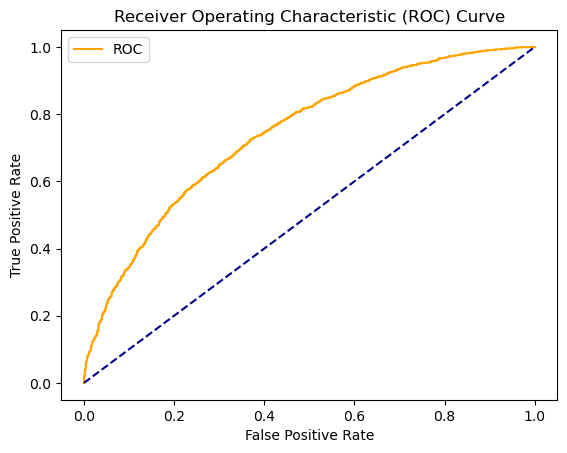

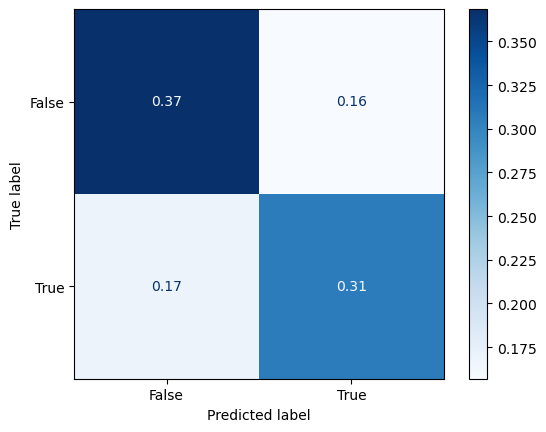

In [55]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.6191315847476306
ROC Area under Curve = 0.6180291781095211
Cohen's Kappa = 0.23611148732061382
Time taken = 0.0790853500366211
              precision    recall  f1-score   support

       False    0.63701   0.63968   0.63834      2384
        True    0.59916   0.59638   0.59777      2153

    accuracy                        0.61913      4537
   macro avg    0.61808   0.61803   0.61805      4537
weighted avg    0.61905   0.61913   0.61909      4537



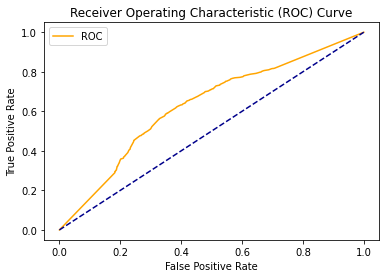

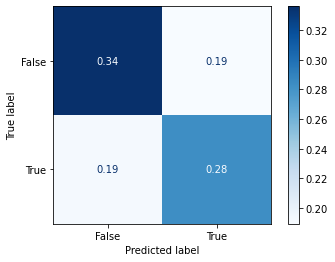

In [54]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.6495481595768129
ROC Area under Curve = 0.6479397407082984
Cohen's Kappa = 0.29629285676520045
Time taken = 6.487981796264648
              precision    recall  f1-score   support

       False    0.66231   0.67953   0.67081      2384
        True    0.63462   0.61635   0.62535      2153

    accuracy                        0.64955      4537
   macro avg    0.64847   0.64794   0.64808      4537
weighted avg    0.64917   0.64955   0.64924      4537



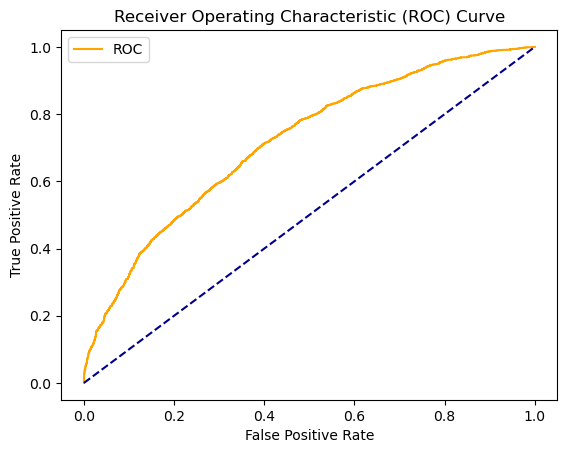

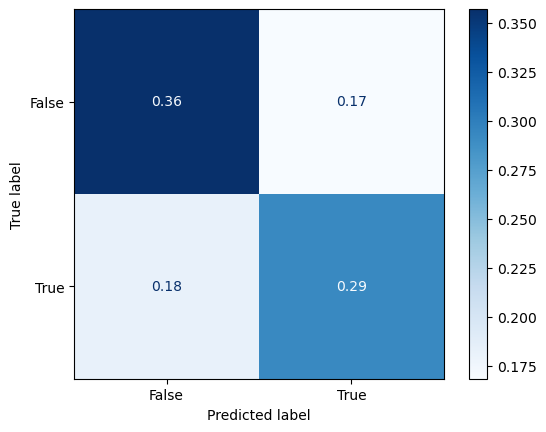

In [21]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Accuracy = 0.6773198148556314
ROC Area under Curve = 0.6763911445555912
Cohen's Kappa = 0.35284580855009173
Time taken = 69.61709022521973
              precision    recall  f1-score   support

       False    0.69231   0.69463   0.69347      2384
        True    0.66061   0.65815   0.65938      2153

    accuracy                        0.67732      4537
   macro avg    0.67646   0.67639   0.67642      4537
weighted avg    0.67726   0.67732   0.67729      4537



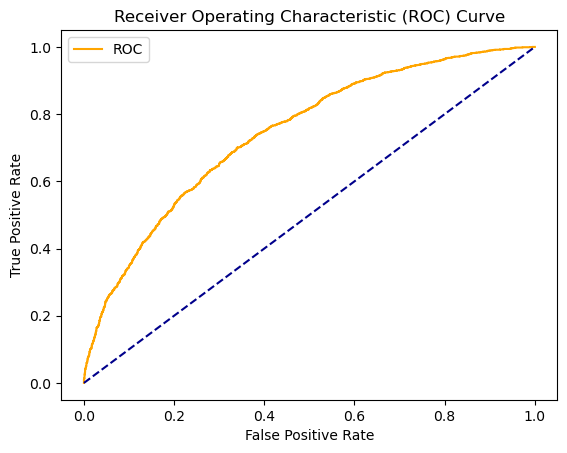

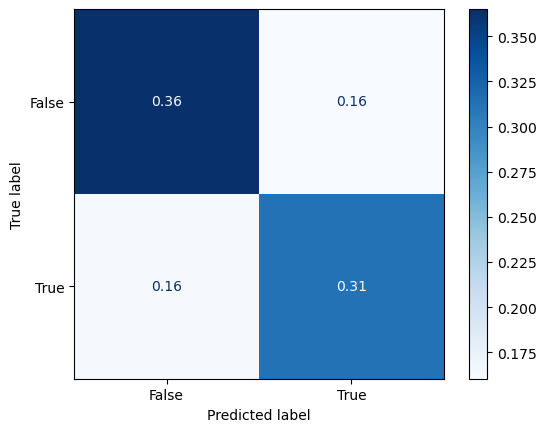

In [22]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

Accuracy = 0.6603482477407979
ROC Area under Curve = 0.6590266780861417
Cohen's Kappa = 0.3183327247758616
Time taken = 0.8015518188476562
              precision    recall  f1-score   support

       False    0.67396   0.68498   0.67943      2384
        True    0.64475   0.63307   0.63886      2153

    accuracy                        0.66035      4537
   macro avg    0.65935   0.65903   0.65914      4537
weighted avg    0.66010   0.66035   0.66017      4537



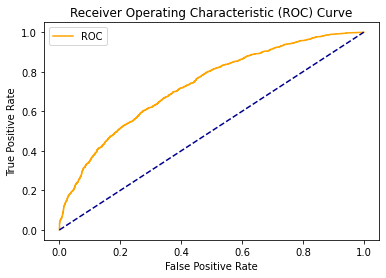

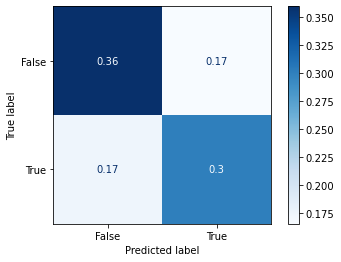

In [57]:
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

Accuracy = 0.6156050253471457
ROC Area under Curve = 0.6146959759598749
Cohen's Kappa = 0.22935066412449867
Time taken = 144.00320315361023
              precision    recall  f1-score   support

       False    0.63468   0.63255   0.63361      2384
        True    0.59463   0.59684   0.59573      2153

    accuracy                        0.61561      4537
   macro avg    0.61466   0.61470   0.61467      4537
weighted avg    0.61568   0.61561   0.61564      4537



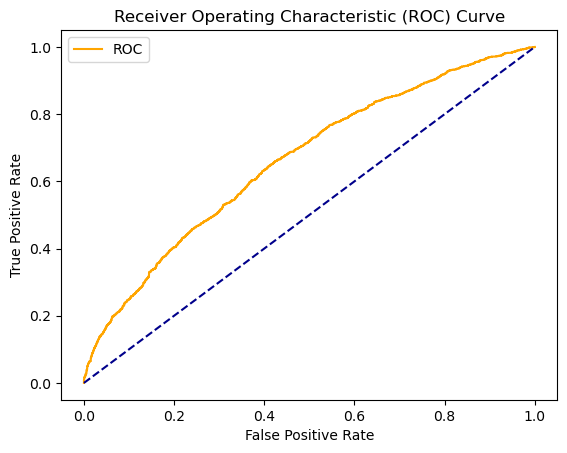

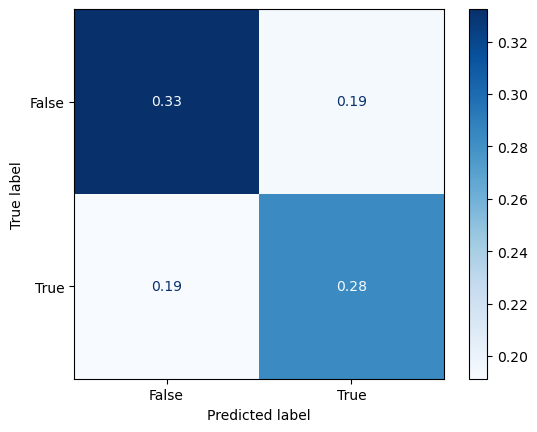

In [23]:
# Gradient Boosting
import xgboost as xgb
params_xgb ={'n_estimators': 1000,
            'max_depth': 128}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

In [24]:
rank.head()

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
2186614,2022-10-02,123.0,Zimbabwe,ZIM,1138.56,1138.56,0.0,CAF
2186615,2022-10-03,123.0,Zimbabwe,ZIM,1138.56,1138.56,0.0,CAF
2186616,2022-10-04,123.0,Zimbabwe,ZIM,1138.56,1138.56,0.0,CAF
2186617,2022-10-05,123.0,Zimbabwe,ZIM,1138.56,1138.56,0.0,CAF
2186618,2022-10-06,125.0,Zimbabwe,ZIM,1138.56,1138.56,2.0,CAF


In [56]:
margin = 0.05

# let's define the rankings at the time of the World Cup
world_cup_rankings = rank.loc[(rank['rank_date'] == rank['rank_date'].max()) & 
                                    rank['country_full'].isin(world_cup.index.unique())]
world_cup_rankings = world_cup_rankings.set_index(['country_full'])

In [57]:
from itertools import combinations

opponents = ['First match \nagainst', 'Second match\n against', 'Third match\n against']

world_cup['points'] = 0
world_cup['total_prob'] = 0

for group in set(world_cup['Group']):
    print('___Starting group {}:___'.format(group))
    for home, away in combinations(world_cup.query('Group == "{}"'.format(group)).index, 2):
        print("{} vs. {}: ".format(home, away), end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'total_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'total_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        
        home_win_prob = model_lr.predict_proba(row)[:,1][0]
        world_cup.loc[home, 'total_prob'] += home_win_prob
        world_cup.loc[away, 'total_prob'] += 1-home_win_prob
        
        points = 0
        if home_win_prob <= 0.5 - margin:
            print("{} wins with {:.2f}".format(away, 1-home_win_prob))
            world_cup.loc[away, 'points'] += 3
        if home_win_prob > 0.5 - margin:
            points = 1
        if home_win_prob >= 0.5 + margin:
            points = 3
            world_cup.loc[home, 'points'] += 3
            print("{} wins with {:.2f}".format(home, home_win_prob))
        if points == 1:
            print("Draw")
            world_cup.loc[home, 'points'] += 1
            world_cup.loc[away, 'points'] += 1

___Starting group D:___
France vs. Denmark: Draw
France vs. Tunisia: France wins with 0.59
France vs. Australia: France wins with 0.63
Denmark vs. Tunisia: Denmark wins with 0.56
Denmark vs. Australia: Denmark wins with 0.60
Tunisia vs. Australia: Draw
___Starting group G:___
Brazil vs. Serbia: Brazil wins with 0.57
Brazil vs. Switzerland: Draw
Brazil vs. Cameroon: Brazil wins with 0.68
Serbia vs. Switzerland: Switzerland wins with 0.59
Serbia vs. Cameroon: Serbia wins with 0.56
Switzerland vs. Cameroon: Switzerland wins with 0.60
___Starting group C:___
Argentina vs. Saudi Arabia: Argentina wins with 0.70
Argentina vs. Mexico: Draw
Argentina vs. Poland: Argentina wins with 0.57
Saudi Arabia vs. Mexico: Mexico wins with 0.73
Saudi Arabia vs. Poland: Poland wins with 0.67
Mexico vs. Poland: Draw
___Starting group B:___
England vs. Iran: Draw
England vs. United States: Draw
England vs. Wales: Draw
Iran vs. United States: United States wins with 0.58
Iran vs. Wales: Wales wins with 0.56
U

In [60]:
pairing = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]

world_cup = world_cup.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
next_round_wc = world_cup.groupby('Group').nth([0, 1]) # select the top 2
next_round_wc = next_round_wc.reset_index()
next_round_wc = next_round_wc.loc[pairing]
next_round_wc = next_round_wc.set_index('Team')

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

labels = list()
odds = list()

for f in finals:
    print("___Starting of the {}___".format(f))
    iterations = int(len(next_round_wc) / 2)
    winners = []

    for i in range(iterations):
        home = next_round_wc.index[i*2]
        away = next_round_wc.index[i*2+1]
        print("{} vs. {}: ".format(home,
                                   away), 
                                   end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'total_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'total_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points

        home_win_prob = model_lr.predict_proba(row)[:,1][0]
        if model_lr.predict_proba(row)[:,1] <= 0.5:
            print("{0} wins with probability {1:.2f}".format(away, 1-home_win_prob))
            winners.append(away)
        else:
            print("{0} wins with probability {1:.2f}".format(home, home_win_prob))
            winners.append(home)

        labels.append("{}({:.2f}) vs. {}({:.2f})".format(world_cup_rankings.loc[home, 'country_abrv'], 
                                                        1/home_win_prob, 
                                                        world_cup_rankings.loc[away, 'country_abrv'], 
                                                        1/(1-home_win_prob)))
        odds.append([home_win_prob, 1-home_win_prob])
                
    next_round_wc = next_round_wc.loc[winners]
    print("\n")

___Starting of the round_of_16___
Netherlands vs. United States: United States wins with probability 0.51
Argentina vs. Denmark: Denmark wins with probability 0.52
Germany vs. Belgium: Belgium wins with probability 0.62
Brazil vs. Portugal: Portugal wins with probability 0.51
Senegal vs. Wales: Wales wins with probability 0.55
Mexico vs. France: France wins with probability 0.61
Spain vs. Croatia: Croatia wins with probability 0.53
Switzerland vs. Uruguay: Uruguay wins with probability 0.56


___Starting of the quarterfinal___
United States vs. Denmark: Denmark wins with probability 0.59
Belgium vs. Portugal: Portugal wins with probability 0.51
Wales vs. France: France wins with probability 0.64
Croatia vs. Uruguay: Uruguay wins with probability 0.55


___Starting of the semifinal___
Denmark vs. Portugal: Portugal wins with probability 0.56
France vs. Uruguay: France wins with probability 0.50


___Starting of the final___
Portugal vs. France: France wins with probability 0.59




In [61]:
next_round_wc = world_cup.groupby('Group').nth([0, 1]) 
teams_through = next_round_wc['Team']


In [62]:
teams_through

Group
A      Netherlands
A          Senegal
B            Wales
B    United States
C        Argentina
C           Mexico
D           France
D          Denmark
E          Germany
E            Spain
F          Croatia
F          Belgium
G           Brazil
G      Switzerland
H          Uruguay
H         Portugal
Name: Team, dtype: object

In [106]:
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

node_sizes = pd.DataFrame(list(reversed(odds)))
scale_factor = 0.3 # for visualization
G = nx.balanced_tree(2, 3)
pos = graphviz_layout(G, prog='circo')
centre = pd.DataFrame(pos).mean(axis=1).mean()

plt.figure(figsize=(10, 10))
ax = plt.subplot(1,1,1)
# add circles 
circle_positions = [(235, 'black'), (180, 'blue'), (120, 'red'), (60, 'yellow')]
[ax.add_artist(plt.Circle((centre, centre), 
                          cp, color='grey', 
                          alpha=0.2)) for cp, c in circle_positions]

# draw first the graph
nx.draw(G, pos, 
        node_color=node_sizes.diff(axis=1)[1].abs().pow(scale_factor), 
        node_size=node_sizes.diff(axis=1)[1].abs().pow(scale_factor)*2000, 
        alpha=1, 
        cmap='Reds',
        edge_color='black',
        width=10,
        with_labels=False)

# draw the custom node labels
shifted_pos = {k:[(v[0]-centre)*0.9+centre,(v[1]-centre)*0.9+centre] for k,v in pos.items()}
nx.draw_networkx_labels(G, 
                        pos=shifted_pos, 
                        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=.5, alpha=1),
                        labels=dict(zip(reversed(range(len(labels))), labels)))

texts = ((10, 'Best 16', 'black'), (70, 'Quarter-\nfinal', 'blue'), (130, 'Semifinal', 'red'), (190, 'Final', 'yellow'))
[plt.text(p, centre+20, t, 
          fontsize=12, color='grey', 
          va='center', ha='center') for p,t,c in texts]
plt.axis('equal')
plt.title('Single-elimination phase\npredictions with fair odds', fontsize=20)
plt.show()

FileNotFoundError: [WinError 2] "circo" not found in path.

In [ ]:

import pygraphviz
pygraphviz.__version__
pygraphviz.test()